# Visualization Fundamental With Matplotlib

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
sale = pd.read_excel('Data/supermarket_sales_nan.xlsx')
sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,0.547222,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,0.436806,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,0.557639,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,0.856250,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,0.442361,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
'''
C1: Print info of dataset
C2: Print describe of dataset
C3: Print unique value of Product line
C4: Print total Quantity
C5: Total gross income by Product line
C6: Average unit price by Gender
C7: Total Quantity by City
C8: Total Revenue (Total) by Customer type 
C9: Total Quantity by Branch
'''

In [13]:
sale['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
'''
Thể hiện doanh số của 3 siêu thị Aoen, BigC, Coop trong 4 tuần của tháng 1. 
Đâu là tuần cao điểm bán hàng của các siêu thị này?
'''

'\nThể hiện doanh số của 3 siêu thị Aoen, BigC, Coop trong 4 tuần của tháng 1. \nĐâu là tuần cao điểm bán hàng của các siêu thị này?\n'

In [15]:
sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<img src='output.png'>

## Bước 1: Chuẩn bị data đầu vào

In [112]:
# quantity by week_num, branch
sale['Date'] = sale['Date'].astype('datetime64')
sale['week_num'] = sale['Date'].dt.week

# sale

# sale['Date'].dt.year

sale_by_period = sale.groupby(['week_num','Branch'],as_index=False)['Quantity'].sum()
sale_by_period
sale_m1 = sale_by_period[sale_by_period['week_num']<=4]
sale_m1

,week_num,Branch,Quantity
0,1,A,130
1,1,B,102
2,1,C,73
3,2,A,141
4,2,B,128
5,2,C,162
6,3,A,189
7,3,B,111
8,3,C,161
9,4,A,170


In [113]:
# prepare data on plot
x = sale_m1['week_num'].unique()
A = sale_m1[sale_m1['Branch']=='A']['Quantity'].unique()
B = sale_m1[sale_m1['Branch']=='B']['Quantity'].unique()
C = sale_m1[sale_m1['Branch']=='C']['Quantity'].unique()

In [116]:
x,A

(array([1, 2, 3, 4]), array([130, 141, 189, 170]))

## Bước 2: Dựng chart đầu tiên

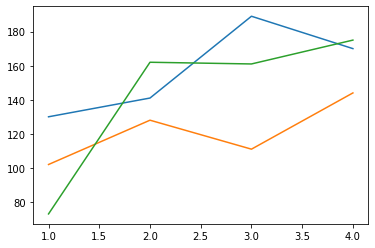

In [18]:
# first plot
plt.plot(x,A)
plt.plot(x,B)
plt.plot(x,C)

plt.show()

## Bước 3: Bổ sung tiêu đề, legend cho chart và axis

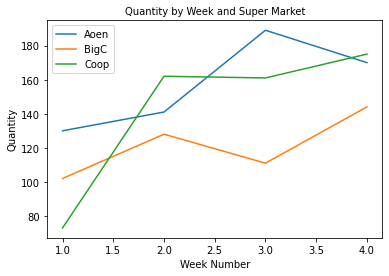

In [20]:
# Add legend, title
plt.plot(x,A,label='Aoen')
plt.plot(x,B,label='BigC')
plt.plot(x,C,label='Coop')

plt.title('Quantity by Week and Super Market', fontsize=10)
plt.xlabel('Week Number', fontsize=10)
plt.ylabel('Quantity', fontsize=10)

plt.legend(loc="upper left") #loc -> location

plt.show()

## Bước 4: Điều chỉnh trục hoành

In [117]:
sale_m1_4w = sale_m1[sale_m1['week_num']<5]
x = sale_m1_4w['week_num'].unique().astype('str')
values = ['Week_'+ n for n in x]
values

['Week_1', 'Week_2', 'Week_3', 'Week_4']

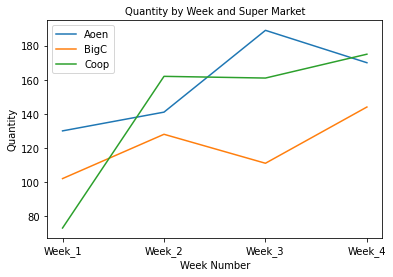

In [21]:
# Cách 1:

sale_m1_4w = sale_m1[sale_m1['week_num']<5]
x = sale_m1_4w['week_num'].unique().astype('str')
A = sale_m1_4w[sale_m1_4w['Branch']=='A']['Quantity'].unique()
B = sale_m1_4w[sale_m1_4w['Branch']=='B']['Quantity'].unique()
C = sale_m1_4w[sale_m1_4w['Branch']=='C']['Quantity'].unique()

values = ['Week_'+ n for n in x]

plt.plot(x,A,label='Aoen')
plt.plot(x,B,label='BigC')
plt.plot(x,C,label='Coop')

plt.title('Quantity by Week and Super Market', fontsize=10)
plt.xlabel('Week Number', fontsize=10)
plt.ylabel('Quantity', fontsize=10)

plt.legend(loc="upper left")

plt.xticks(x,values)

plt.show()

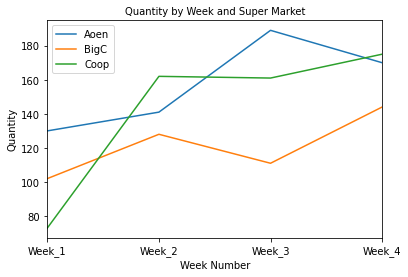

In [22]:
# Cách 2:

x = sale_m1['week_num'].unique().astype('str')

values = ['Week_'+ n for n in x]

plt.plot(x,A,label='Aoen')
plt.plot(x,B,label='BigC')
plt.plot(x,C,label='Coop')

plt.title('Quantity by Week and Super Market', fontsize=10)
plt.xlabel('Week Number', fontsize=10)
plt.ylabel('Quantity', fontsize=10)

plt.legend(loc="upper left")

plt.xticks(x,values)

plt.xlim(0,3)

plt.show()

## Bước 5: Add labels, text

In [23]:
def addlabels(xs,ys):
    for x,y in zip(xs,ys):

        label = "{:.0f}".format(y)

        plt.annotate(label, # this is the text
                     xy=(x,y), # these are the coordinates to position the label
                     xytext=(x,y-2),
                     ha='center')

In [24]:
def addtext(x,y,text):
    plt.annotate(text, # this is the text
                 xy=(x,y), # these are the coordinates to position the label
                 xytext=(x,y+5),
                 color='red',
                 arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4),
                 horizontalalignment='left',verticalalignment='top')

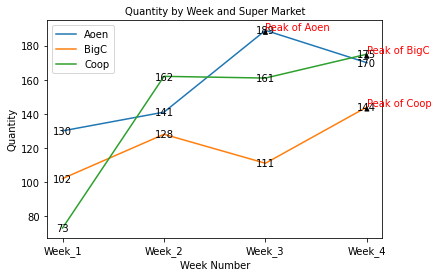

In [25]:
# Add text & label

sale_m1_4w = sale_m1[sale_m1['week_num']<5]
x = sale_m1_4w['week_num'].unique().astype('str')
A = sale_m1_4w[sale_m1_4w['Branch']=='A']['Quantity'].unique()
B = sale_m1_4w[sale_m1_4w['Branch']=='B']['Quantity'].unique()
C = sale_m1_4w[sale_m1_4w['Branch']=='C']['Quantity'].unique()

values = ['Week_'+ n for n in x]

plt.plot(x,A,label='Aoen')
plt.plot(x,B,label='BigC')
plt.plot(x,C,label='Coop')

plt.title('Quantity by Week and Super Market', fontsize=10)
plt.xlabel('Week Number', fontsize=10)
plt.ylabel('Quantity', fontsize=10)

plt.legend(loc="upper left")
plt.xticks(x,values)

addlabels(x,A)
addlabels(x,B)
addlabels(x,C)

addtext(2,189,'Peak of Aoen')
addtext(3,175,'Peak of BigC')
addtext(3,144,'Peak of Coop')

plt.show()

## Bước 6: Điều chỉnh kích thước và Hoàn thiện chart

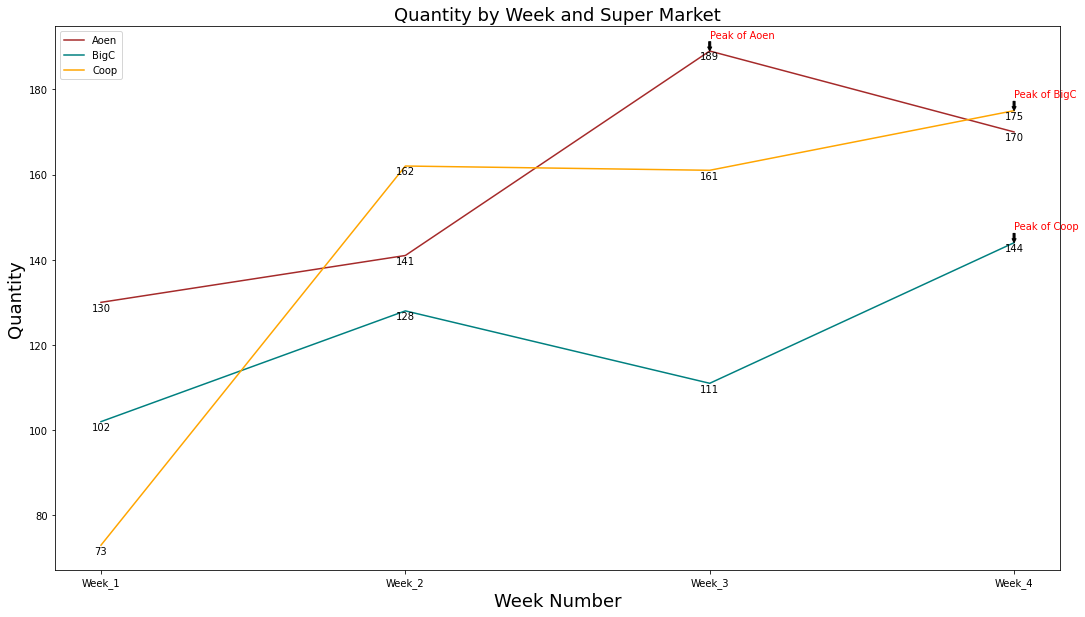

In [26]:
#Prepare data
sale_m1_4w = sale_m1[sale_m1['week_num']<5]
x = sale_m1_4w['week_num'].unique().astype('str')
A = sale_m1_4w[sale_m1_4w['Branch']=='A']['Quantity'].unique()
B = sale_m1_4w[sale_m1_4w['Branch']=='B']['Quantity'].unique()
C = sale_m1_4w[sale_m1_4w['Branch']=='C']['Quantity'].unique()

#Set Size
plt.figure(figsize=(18,10))


#Plot
plt.plot(x,A,label='Aoen',c='brown')
plt.plot(x,B,label='BigC',c='teal')
plt.plot(x,C,label='Coop',c='orange')

# Decorate
plt.title('Quantity by Week and Super Market', fontsize=18)
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Quantity', fontsize=18)
plt.legend(loc="upper left")

values = ['Week_'+ n for n in x]
plt.xticks(x,values)

addlabels(x,A)
addlabels(x,B)
addlabels(x,C)

addtext(2,189,'Peak of Aoen')
addtext(3,175,'Peak of BigC')
addtext(3,144,'Peak of Coop')

plt.show()

# Combine seaborn and matplotlib

In [27]:
import seaborn as sns

In [28]:
sale_m1_4w['week_num'] = sale_m1_4w['week_num'].astype(str)

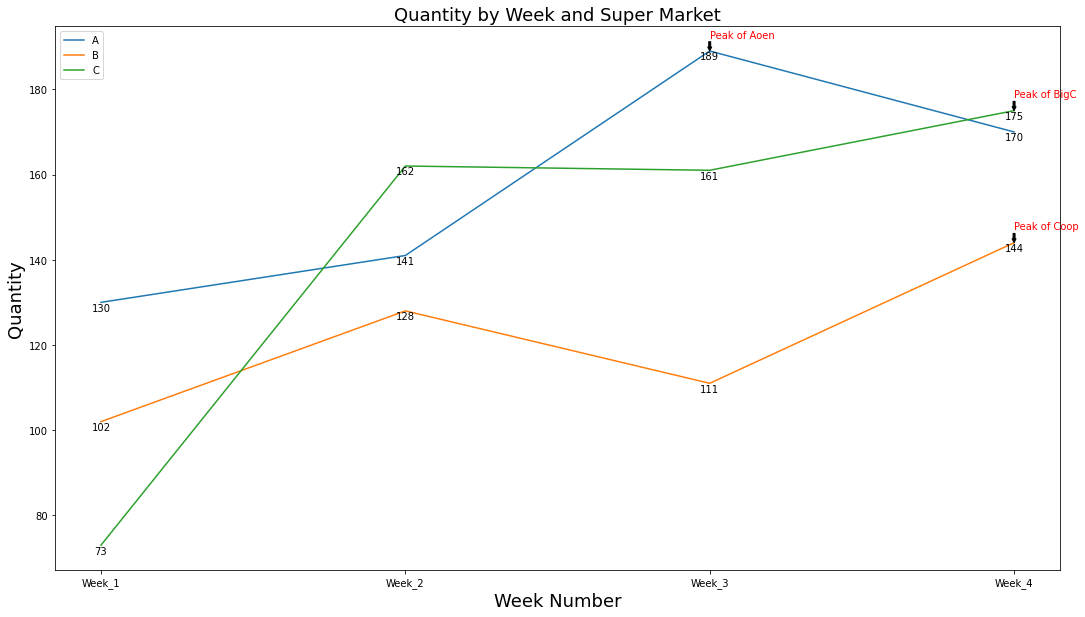

In [29]:
#Set Size
plt.figure(figsize=(18,10))

#Plot
sns.lineplot(data=sale_m1_4w,x='week_num',y='Quantity',hue='Branch')

# Decorate
plt.title('Quantity by Week and Super Market', fontsize=18)
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Quantity', fontsize=18)
plt.legend(loc="upper left")

values = ['Week_'+ n for n in x]
plt.xticks(x,values)

addlabels(x,A)
addlabels(x,B)
addlabels(x,C)

addtext(2,189,'Peak of Aoen')
addtext(3,175,'Peak of BigC')
addtext(3,144,'Peak of Coop')

In [31]:
sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,week_num
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,9
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,6


In [ ]:
'''
C1. Tổng số lượng đơn hàng (invoiceID) của từng siêu thị
C2. Tổng số sản phẩm bán ra (Quantity) của từng siêu thị, theo từng giới tính
C3. Đóng góp của từng nhóm sản phẩm vào tổng doanh thu (Total)
C4. So sánh doanh thu của các thành phố, trong mỗi thành phố chia nhỏ theo từng nhóm khách hàng
C5. So sánh đơn giá trung bình của từng nhóm sản phẩm, qua từng tháng
C6. Mối quan hệ giữa chi phí và doanh thu
C7. Phân bổ của đơn giá
C8. Phân bổ của doanh thu, có outlier hay không (box plot)
C9. Trong từng nhóm sản phẩm, mỗi phương thức thanh toán đóng góp % đơn hàng ntn?
'''